## Data Visualization: Vietnam weather data Dataset

### Thu thập dữ liệu

 - Ngữ cảnh sử dụng bộ dataset này
    - Nghiên cứu khí hậu: Bộ dữ liệu này cung cấp thông tin về thời tiết trong suốt hơn 12 năm tại 40 tỉnh thành Việt Nam. Điều này cho phép nhà nghiên cứu và các nhà khoa học khí hậu phân tích và hiểu sâu về các xu hướng, biến đổi và mô hình hóa khí hậu trong khu vực này. Bạn có thể tìm hiểu về mô phỏng biến đổi khí hậu, hiệu ứng của biến đổi khí hậu lên các yếu tố khác nhau như nông nghiệp, môi trường, hay nguồn nước.

    - Dự báo thời tiết: Bộ dữ liệu này có thể được sử dụng để phát triển mô hình dự báo thời tiết. Bằng cách phân tích dữ liệu lịch sử và xây dựng mô hình dự báo, bạn có thể cung cấp dự báo thời tiết cho các tỉnh thành Việt Nam trong tương lai gần hoặc xa. Điều này hữu ích cho các công ty, tổ chức hoặc cá nhân quan tâm đến dự báo thời tiết để lập kế hoạch hoạt động, điều hành hoặc tối ưu hóa các hoạt động hàng ngày.

    - Phân tích địa lý: Với bộ dữ liệu này, bạn có thể nghiên cứu tương quan giữa khí hậu và địa lý. Bạn có thể phân tích tác động của vị trí địa lý, địa hình, hoặc các yếu tố tự nhiên khác đến thời tiết của một khu vực cụ thể. Điều này có thể hữu ích trong việc đánh giá tác động của sự biến đổi khí hậu lên một khu vực địa lý cụ thể hoặc hiểu rõ hơn về các đặc điểm địa lý ảnh hưởng đến khí hậu trong khu vực.

    - Ứng dụng công nghệ: Bộ dữ liệu thời tiết cũng có thể được sử dụng để phát triển các ứng dụng công nghệ liên quan đến thời tiết, chẳng hạn như các ứng dụng di động, trang web dự báo thời tiết, hoặc hệ thống cảnh báo thời tiết. Với thông tin chi tiết về thời tiết trong quá khứ, bạn có thể cải thiện tính chính xác của các ứng dụng này và cung cấp thông tin hữu ích cho người dùng.

    - Giáo dục và tìm hiểu: Bộ dữ liệu này cung cấp một nguồn tài liệu phong phú để giáo dục và tìm hiểu về khí hậu và thời tiết của Việt Nam. Sinh viên, học sinh, hoặc những người quan tâm có thể sử dụng nó để nghiên cứu, viết bài luận, hoặc đào sâu vào lĩnh vực này.

- Chủ đề và nguồn của bộ dữ liệu này: Bộ dữ liệu về thời tiết của Việt Nam từ ngày 1 tháng 1 năm 2009 đến ngày 18 tháng 6 năm 2021 cho 40 tỉnh thành. Bộ dữ liệu này được đăng lên Kaggle bởi **VĂN VIẾT HIẾU ANH** và được chia sẻ trên Kaggle cho mục đích học tập và nghiên cứu. 
- License: **CC0: Public Domain**
- Phương pháp thu thập: Quan sát 

### Import thư viện

In [2]:
# Pandas, Numpy dùng để xử lí các table và number
import pandas as pd
import numpy as np
# Matplotlib: dùng để trực quan hóa dữ liệu
# Seaborn: dùng để trực quan hóa dữ liệu
import matplotlib.pyplot as plt
import seaborn as sns
# plotly: dùng để trực quan hóa, tuy nhiên người dùng còn có thể tương tác trực tiếp với biểu đồ
import plotly.express as px
import plotly.graph_objects as go

## Đọc dữ liệu từ file csv

In [3]:
df = pd.read_csv("./weather.csv",encoding = "ISO-8859-1")

### Tiền xử lý dữ liệu 
#### In 5 dòng đầu tiên

In [4]:
df.head()

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date
0,Bac Lieu,27,22,17,NNE,6.9,90,71,1010,2009-01-01
1,Bac Lieu,31,25,20,ENE,0.0,64,24,1010,2010-01-01
2,Bac Lieu,29,24,14,E,0.0,75,45,1008,2011-01-01
3,Bac Lieu,30,24,30,E,0.0,79,52,1012,2012-01-01
4,Bac Lieu,31,25,20,ENE,0.0,70,24,1010,2013-01-01


#### Thông tin số dòng và số cột

In [5]:
df.shape

(181960, 10)

#### Thông tin cột

In [6]:
df.columns

Index(['province', 'max', 'min', 'wind', 'wind_d', 'rain', 'humidi', 'cloud',
       'pressure', 'date'],
      dtype='object')

 - Cột `province` là các tỉnh thành
 - Cột `max` là nhiệt độ tối đa của ngày 
 - Cột `min` là nhiệt độ tối thiểu của ngày 
 - Cột `wind` là tốc độ gió (km/h) 
 - Cột `wind_d` là huống gió 
 - Cột `rain` là lượng mưa 
 - Cột `humidi` là % độ ẩm 
 - Cột `cloud` là % gió
 - Cột `pressure` là áp suất
 - Cột `date` là ngày thu thập dữ liệu

#### Kiểu dữ liệu của từng cột

In [7]:
df.dtypes

province     object
max           int64
min           int64
wind          int64
wind_d       object
rain        float64
humidi        int64
cloud         int64
pressure      int64
date         object
dtype: object

 - Dữ liệu của các cột `max`, `min`, `wind`, `humidi`, `cloud`, `pressure` là kiểu số nguyên 
 - Dữ liệu của các cột `rain` là kiểu số thực 
 - Các dữ liệu ở các cột còn lại thuộc kiểu non-numeric

#### Số giá trị null của từng cột

In [8]:
df.isnull().sum()

province    0
max         0
min         0
wind        0
wind_d      0
rain        0
humidi      0
cloud       0
pressure    0
date        0
dtype: int64

Ta thấy không có giá trị null trong dataframe

### Chuyển về kiểu dữ liệu datetime

Áp dụng cho cột `date` 

In [9]:
df["date"] = pd.to_datetime(df["date"])


Kiểu tra kiểu dữ liệu

In [10]:
df.dtypes

province            object
max                  int64
min                  int64
wind                 int64
wind_d              object
rain               float64
humidi               int64
cloud                int64
pressure             int64
date        datetime64[ns]
dtype: object

Cách trích xuất thông tin từ dữ liệu datetime

In [11]:
df['date'].dt.day

0          1
1          1
2          1
3          1
4          1
          ..
181955    28
181956    28
181957    28
181958    28
181959    28
Name: date, Length: 181960, dtype: int64

#### Kiểm tra các dòng bị trùng lặp

In [12]:
df.duplicated().sum()

0

Không có dòng nào mà dữ liệu bị lặp

In [13]:
df.head()

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date
0,Bac Lieu,27,22,17,NNE,6.9,90,71,1010,2009-01-01
1,Bac Lieu,31,25,20,ENE,0.0,64,24,1010,2010-01-01
2,Bac Lieu,29,24,14,E,0.0,75,45,1008,2011-01-01
3,Bac Lieu,30,24,30,E,0.0,79,52,1012,2012-01-01
4,Bac Lieu,31,25,20,ENE,0.0,70,24,1010,2013-01-01


#### Mô tả dữ liệu

Tìm hiểu các cột có dữ liệu numerical

In [14]:
df.describe()

,max,min,wind,rain,humidi,cloud,pressure
count,181960.000000,181960.000000,181960.000000,181960.000000,181960.000000,181960.000000,181960.000000
mean,29.837277,23.277874,11.038657,6.567130,77.083068,41.721268,1010.229127
std,4.571345,3.945381,5.311807,13.602055,9.288553,23.875067,4.635714
min,4.000000,2.000000,1.000000,0.000000,23.000000,0.000000,988.000000
25%,28.000000,21.000000,7.000000,0.100000,71.000000,23.000000,1008.000000
50%,31.000000,24.000000,10.000000,1.800000,78.000000,38.000000,1010.000000
75%,33.000000,26.000000,14.000000,7.500000,83.000000,58.000000,1012.000000
max,46.000000,32.000000,54.000000,596.400000,100.000000,100.000000,1038.000000


 - Nhiệt độ tối đa đạt được là gần 30 độ 
 - Nhiệt độ tối thiểu đạt được là 23 độ 
 - Tốc độ gió trung bình là 11km/h 
 

Tìm hiểu các cột có dữ liệu categorical

In [15]:
cat_features = [f for f in df.columns if(df[f].dtype=='O')]
tmp = df[cat_features].describe()

tmp

,province,wind_d
count,181960,181960
unique,40,16
top,Bac Lieu,ESE
freq,4549,21526


In [16]:
print('Percent of Bac Lieu of total province: ' + str(tmp.loc['freq', 'province'] * 100 / tmp.loc['count', 'province']))
print('Percent of ESE of total total province: ' + str(tmp.loc['freq', 'wind_d'] * 100 / tmp.loc['count', 'wind_d']))


Percent of Bac Lieu of total province: 2.5
Percent of ESE of total total province: 11.830072543416135


### Khám phá mối quan hệ trong dữ liệu

**Câu hỏi 1**: Nhiệt độ trung bình của các tỉnh thành là bao nhiêu?
 
**Câu hỏi 2**: Tốc độ gió trung bình là bao nhiêu 

**Câu hỏi 3**: Huống gió phổ biến nhất là gì? 

**Câu hỏi 4**: Có sự tương quan giữa lượng mưa và độ ẩm không?

**Câu hỏi 5**: Áp suất có biến đổi theo thời gian không? 

**Câu hỏi 6**: Mối tương quan giữa tốc độ gió, lượng mưa và độ ẩm

##### Câu hỏi 1:

C:\Users\ACER\AppData\Local\Temp\ipykernel_1972\3973629247.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_temp = df.groupby('province')['max', 'min'].mean()


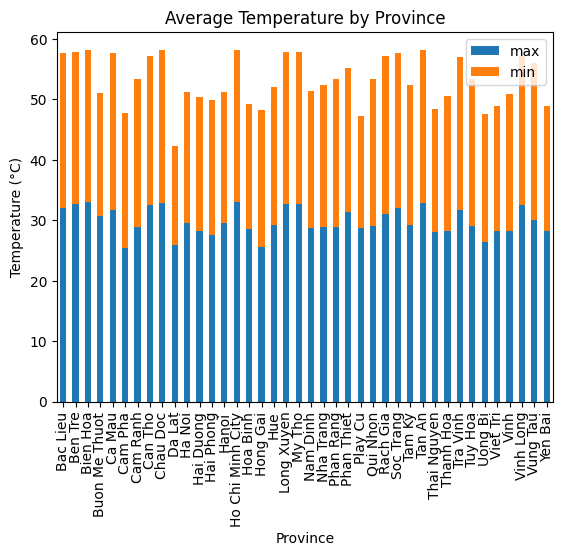

In [17]:
avg_temp = df.groupby('province')['max', 'min'].mean()
avg_temp.plot(kind='bar', stacked=True)
plt.title('Average Temperature by Province')
plt.xlabel('Province')
plt.ylabel('Temperature (°C)')
plt.show()

##### Câu hỏi 2: 

In [18]:
avg_wind = df['wind'].mean()
print('Average Wind Speed:', avg_wind)

Average Wind Speed: 11.038656847658826


##### Câu hỏi 3: 

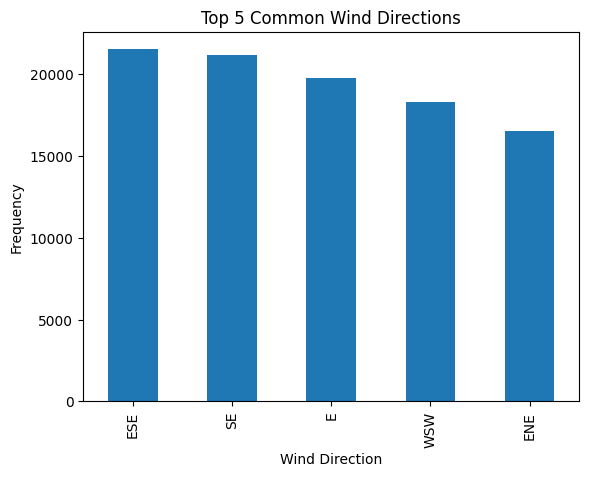

In [19]:
top_wind_d = df['wind_d'].value_counts().head(5)
top_wind_d.plot(kind='bar')
plt.title('Top 5 Common Wind Directions')
plt.xlabel('Wind Direction')
plt.ylabel('Frequency')
plt.show()

##### Câu hỏi 5:

In [ ]:
correlation = df[['rain', 'humidi']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Rainfall and Humidity')
plt.show()